# Pyroxene Classification Diagrams
- The function uses fields for the pyroxene ternary from Deer, Howie, and Zussman (1963).
- This function relies heavily on the ternary plot package from Marc Harper et al. 2015 - https://github.com/marcharper/python-ternary, if you use these figures, you must cite that (Marc Harper et al. (2015). python-ternary: Ternary Plots in Python. Zenodo. 10.5281/zenodo.594435) as well as Thermobar. 
- You may have problems with this package if you have the separate "ternary" package installed (yes, there are python packages called ternary and python-ternary- Yay!). I (penny) got the error "module ternary has no attribute figure", so had to uninstall the ternary I had through pip (pip uninstall ternary), and re-install python-ternary through conda in the command line "conda install python-ternary". If you have everything in pip, or conda, keep in 1 environment, don't follow my bad example here!
- You can download the excel spreadsheet with Cpx data from:
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Cpx_Cpx_Liq_Thermobarometry/Cpx_Liq_Example.xlsx

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt

##  Load in some Cpx compositions

In [2]:
out=pt.import_excel('Cpx_Liq_Example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

## Lets transform these Cpx compositions into the 3 coordinates we need for plotting on our ternary diagrams.
- We are plotting in Mg-Fe-Ca space, so En is simply Mg/(Mg+Fet+Ca) etc.

In [3]:
cpx_comps_tern=pt.tern_points_px(px_comps=Cpxs)

## Example 1
- Lets draw the diagram first to show you options
-  (hold on, we'll add data in a second)

### Example 1a - Simplicest, no grid, no labels, trimming off the top to make a quadrilateral

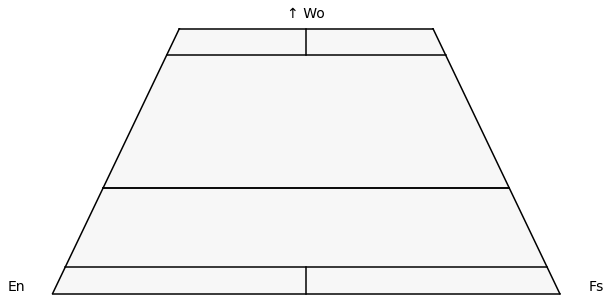

In [5]:
fig, tax = pt.plot_px_classification(figsize=(10, 5))

### Example 1b - Lets keep the top!

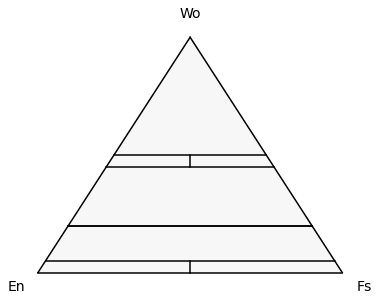

In [6]:
fig, tax = pt.plot_px_classification(figsize=(6,5), cut_in_half=False)

### Example 1c- Lets add the field names on
- You can change font size using fontsize_component_labels to match the fig size

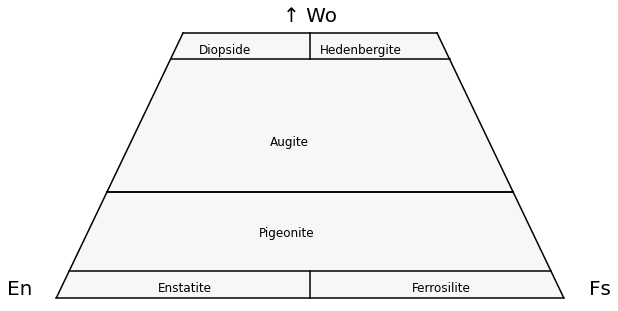

In [7]:
fig, tax = pt.plot_px_classification(figsize=(10, 5), labels=True, 
                                     fontsize_component_labels=12,
                                    fontsize_axes_labels=20)

## Example 1d - Lets add a grid

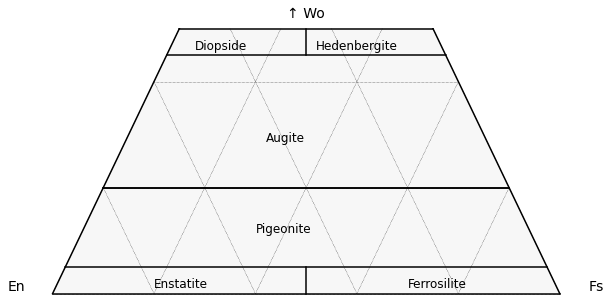

In [8]:
fig, tax = pt.plot_px_classification(figsize=(10, 5), labels=True, fontsize_component_labels=12,
                                     major_grid=True)

### Example 1e - Lets add a minor grid

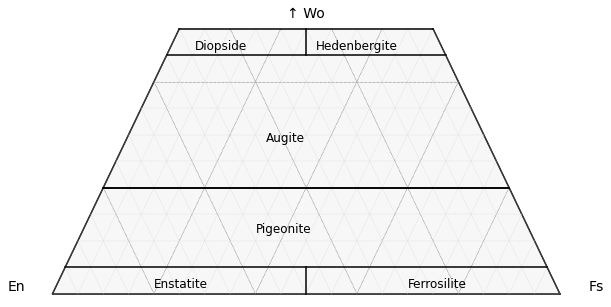

In [9]:
fig, tax = pt.plot_px_classification(figsize=(10, 5), labels=True, fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Example 2 - Lets add your data (simple to start!)

<AxesSubplot:>

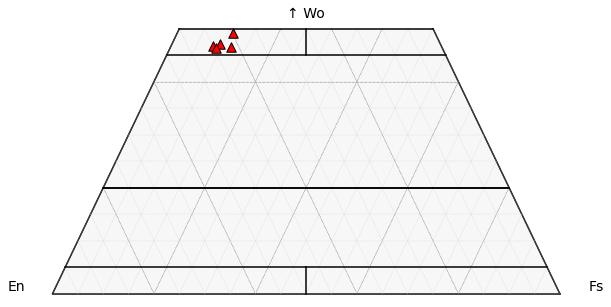

In [10]:
# First, define the plot as above.
fig, tax = pt.plot_px_classification(figsize=(10, 5),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Now feed in your data we calculated at the start in terms of ternary axes!

tax.scatter(
    cpx_comps_tern,
    edgecolor="k",
    marker="^",
    facecolor="red",
    label='Label1',
   s=90
)
    

## Example 3 - Lets color by Px Jd content

<AxesSubplot:>

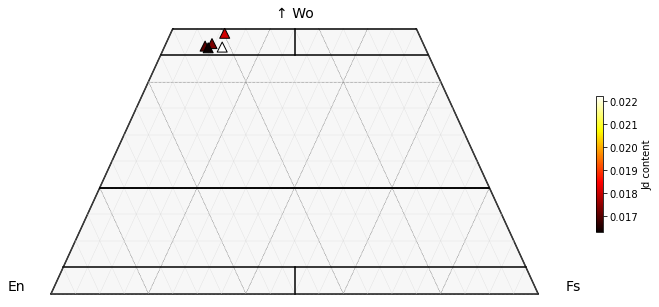

In [11]:
fig, tax = pt.plot_px_classification(figsize=(12, 5),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

# We need to calculate Cpx compositions to get Jd
cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs)
tax.scatter(
    cpx_comps_tern,
    c=cpx_comps["Jd"],
    vmin=np.min(cpx_comps["Jd"]),
    vmax=np.max(cpx_comps["Jd"]),
    s=100,
    edgecolor="k",
    marker="^",
    cmap="hot",
    colormap="hot",
    colorbar=True,
    cb_kwargs={"shrink": 0.5, "label": "Jd content"},
    
)
#  Uncomment to save the figure. 
#fig.savefig('Pyroxene_Class.png', dpi=200)